<a href="https://colab.research.google.com/github/RaminTK/Hoboken-Resiliency/blob/main/Hoboken_Resiliency_Sim_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import networkx as nx
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
a = pd.read_csv('drive/MyDrive/Raif/Survey v.6 - Descriptive 1.csv')[['Do you work in Hoboken, NJ?','Do you live in Hoboken, NJ?','Please recollect situations where you encountered a puddle or submerged roads. Which of the following best describes your course of action?','I believe that area 1',	'I believe that area 2',	'I believe that area 3',	'I believe that area 4',	'I believe that area 5',	'I believe that area 6']]
# a = a.drop(['Timestamp','What is your age?','What is your gender?','What is your highest level of education?'], axis=1)
# a

xx = pd.read_csv('drive/MyDrive/Raif/Survey v.6 - Descriptive 1.csv')['I do not take most flood risk information seriously, including flood advisories.']
xx = xx.replace({'Strongly agree':0,'Somewhat agree':1,'Neither agree nor disagree':2,'Somewhat disagree':3,'Strongly disagree':4})

b = pd.read_csv('drive/MyDrive/Raif/d1.csv')
df = b
a.columns = (['work', 'live','reaction','a1','a2','a3','a4','a5','a6'])
a = a.replace({'Yes': 1, 'No': 0})

a = a.replace({'None of the above':0,'I have never encountered a puddle or submerged roads in the past.':1,'I maneuvered through the water and continued my route.':2, 'I changed my route/destination searching for non-inundated roads.;I maneuvered through the water and continued my route.':3,'I changed my route/destination searching for non-inundated roads.':4 })
a = a.replace({'Will certainly not flood':0,'Is unlikely to flood':1,'Is somewhat likely to flood':2,'Is very likely to flood':3,'Will certainly flood':4})
for col in ['a1', 'a2', 'a3', 'a4', 'a5','a6']:
    a[col] = a[col] * xx
# a.dropna(inplace=True)

# a
# c = pd.concat([a, b], axis=1)


# correlation_matrix = c.corr()

# # Create a correlation heatmap using Seaborn
# sns.heatmap(correlation_matrix, annot=False)

# # Display the heatmap
# plt.show()

In [7]:
a

,work,live,reaction,a1,a2,a3,a4,a5,a6
0,1,0,3,2.0,1.0,0.0,1,1.0,4
1,0,1,2,3.0,0.0,4.0,1,4.0,1
2,0,0,4,6.0,4.0,8.0,0,2.0,6
3,1,0,4,16.0,0.0,16.0,0,16.0,16
4,1,0,4,4.0,4.0,8.0,8,8.0,4
...,...,...,...,...,...,...,...,...,...
56,0,1,4,0.0,0.0,0.0,0,0.0,0
57,0,0,0,NaN,8.0,NaN,4,NaN,4
58,1,1,1,9.0,12.0,9.0,3,6.0,3
59,0,1,3,4.0,6.0,2.0,4,8.0,8


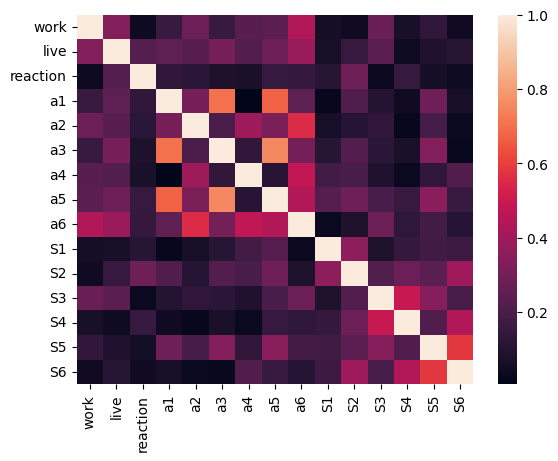

In [8]:
# new_df = pd.DataFrame(columns=df.columns)
# scenario = list(range(6))
# # simulation = []
# for s in scenario:
#   temp_df = df.iloc[:, 3*s:3*s+3]
#   # print(temp_df)
#   path = []
#   for i in range(df.shape[0]):
#       temp_df.sample(n=1)
#       rnd = np.random.rand()
#       if rnd < random_row.iloc[:,0].values:
#           selection = 1
#       elif rnd < random_row.iloc[:,1].values:
#           selection = 2
#       else:
#           selection = 3
#       path.append(selection)
#   simulation.append(path)

# df = pd.DataFrame(simulation).T
# df.columns = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6']
# df


new_df = pd.DataFrame()
for i in range(0, len(df.columns), 3):
    group = df.iloc[:, i:i+3]  # Select three columns at a time
    max_col = group.idxmax(axis=1)  # Get column name with the largest value in each row
    new_df[f'Group_{i//3 + 1}'] = max_col  # Assign the column name as a new column in the new DataFrame
new_df
new_df.columns = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6']

new_df = new_df.replace('S1-', '', regex=True)
new_df = new_df.replace('S2-', '', regex=True)
new_df = new_df.replace('S3-', '', regex=True)
new_df = new_df.replace('S4-', '', regex=True)
new_df = new_df.replace('S5-', '', regex=True)
new_df = new_df.replace('S6-', '', regex=True)
new_df = new_df.replace({'blue': 1,	'black': 2, 'brown': 3})

new_df



b = new_df
c = pd.concat([a, b], axis=1)
c.dropna(inplace=True)


correlation_matrix = abs(c.corr())

# Create a correlation heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=False)

# Display the heatmap
plt.show()

Survey Simulation

In [ ]:
def change_values(x):
    if x == 1:
        return 0
    elif x == 2:
        return 0.25
    elif x == 3:
        return 0.5
    elif x == 4:
        return 0.75
    elif x == 5:
        return 1
    else:
        return x

def normalize(df1):
  df1 = df1.applymap(change_values)
  for i in range(0, df1.shape[1], 3):
      group_sum = df1.iloc[:, i:i+3].sum(axis=1)
      df1.iloc[:, i:i+3] = df1.iloc[:, i:i+3].div(group_sum, axis=0)
  df1.fillna(1/3,inplace = True)
  return df1



def cumulator (df):
  grouped_df = df.values.reshape(-1, 3)
  cumulative_sum = pd.DataFrame(grouped_df).cumsum(axis=1).values.flatten()
  cdf = pd.DataFrame(cumulative_sum.reshape(df.shape), columns=df.columns)
  return cdf


def sim(cdf1,simNum):
  new_df = pd.DataFrame(columns=cdf1.columns)
  scenario = list(range(6))
  simulation = []
  for s in scenario:
    temp_df = cdf1.iloc[:, 3*s:3*s+3]
    path = []
    for _ in range(simNum):
        random_row = temp_df.sample(n=1)
        rnd = np.random.rand()
        if rnd < random_row.iloc[:,0].values:
            selection = 1
        elif rnd < random_row.iloc[:,1].values:
            selection = 2
        else:
            selection = 3
        path.append(selection)
    simulation.append(path)

  df = pd.DataFrame(simulation).T
  df.columns = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6']
  return df


* blue = 1
* black = 2
* brown = 3


In [ ]:
cdf1 = cumulator(normalize(pd.read_csv('drive/MyDrive/Raif/d1.csv')))
cdf2 = cumulator(normalize(pd.read_csv('drive/MyDrive/Raif/d2.csv')))
cdf3 = cumulator(normalize(pd.read_csv('drive/MyDrive/Raif/p1.csv')))
cdf4 = cumulator(normalize(pd.read_csv('drive/MyDrive/Raif/p2.csv')))

# print('group1 - D1')
results = sim(cdf1,1000)
for s in results.columns:
  print(results[s].value_counts())
  print()

# results['S1'].value_counts()

MCS = sim(cdf1,1000)['S1'].value_counts()

1    405
2    387
3    208
Name: S1, dtype: int64

1    487
2    351
3    162
Name: S2, dtype: int64

1    662
3    242
2     96
Name: S3, dtype: int64

1    678
3    224
2     98
Name: S4, dtype: int64

1    597
3    293
2    110
Name: S5, dtype: int64

1    614
3    252
2    134
Name: S6, dtype: int64



In [ ]:
flow = 1000 # Adjust to experiments


SSUE

In [ ]:
def incid(path, edge):
    """
    Parameters
    ----------
    path : list
        Sequence of nodes contained in the node (compatible with Networkx shortest
        path outputs).
    edge : list
        Pair of nodes that constitute a given link (ordered).

    Returns
    -------
    int
        Returns 1 if edge is in path, 0 otherwise.
    """
    edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    if edge in edges:
        return 1
    else:
        return 0


def link_impBPR(free_flow_tt, x, capacity=None, a=0.15, b=4):
    """
    Parameters
    ----------
    Note: free_flow_tt, x and capacity must be in the same edge order.

    free_flow_tt : numpy array
        Array containing free-flow travel times.
    x : numpy array
        Array containing link loads.
    capacity : numpy array, float, optional
        Array or float containing link capacities. Defaults to 760 veh/h
    a : float, optional
        Alpha parameter for BPR function (check out HCM2000). The default is 0.15.
    b : float, optional
        Beta parameter for BPR function (check out HCM2000). The default is 4.0.

    Returns
    -------
    numpy array
        Returns the loaded travel times (impedance) for all links in a numpy array.

    """
    if capacity == None:
        capacity = np.ones(shape=x.shape) * 760
    elif type(capacity) == float:
        capacity = np.ones(shape=x.shape) * capacity
    elif type(capacity) != type(np.array):
        raise TypeError("Please input link capacity in either float or numpy array format")
    return free_flow_tt * (1 + a * (x / capacity) ** b)

def cost_funcBPR(alpha, x, y, free_flow_tt, capacity=None, a=0.15, b=4):
    """
    Parameters
    ----------
    Note: free_flow_tt, x, y and capacity must be in the same edge order.

    alpha : float
        Step size in the y direction.
    x : numpy array
        Current iteration position vector in a numpy array format.
    y : numpy array
        Iteration step direction vector in a numpy array format.
    free_flow_tt : numpy array
        Free flow travel time vector in a numpy array format.
    capacity : numpy array, float, optional
        Array or float containing link capacities. Defaults to 760 veh/h.
    a : float, optional
        Alpha parameter for BPR function (check out HCM2000). The default is 0.15.
    b : float, optional
        Beta parameter for BPR function (check out HCM2000). The default is 4.0.

    Returns
    -------
    numpy array
        Returns the gradient with respect to the step size alpha in a numpy array format.

    """
    if capacity == None:
        capacity = np.ones(shape=x.shape) * 760
    elif type(capacity) == float:
        capacity = np.ones(shape=x.shape) * capacity
    elif type(capacity) != type(np.array):
        raise TypeError("Please input link capacity in either float or numpy array format")
    nx = x + (y - x) * alpha
    return sum(nx * (free_flow_tt + a / b * (nx / capacity) ** b))


def MonteCarlo(lttime, incidence, beta=0.2, niter=100):
    """


    Parameters
    ----------
    lttime : numpy array
        n x 1 array of loaded link travel times (impedance), in numpy array format.
    incidence : numpy array
        n x k matrix of link incidence for each path, should contain 1 if link i is contained
        in path k, and 0 otherwise.
    beta : float, optional
        ratio between mean and standard deviation. The default is 0.2.
    niter : int, optional
        Number of Monte Carlo simulation iterations to be used. The default is 100.

    Raises
    ------
    TypeError
        Travel time and incidence matrix are not of the same length.

    Returns
    -------
    numpy array
        Link usage likelihood (n x 1).
    numpy array
        Path usage likelihood (k x 1).

    """
    if lttime.shape[0] != incidence.shape[1]:
        raise TypeError("travel time and incidence matrix not of same length")
    pusage = np.zeros(shape=(incidence.shape[0],))
    y = np.zeros(shape=(incidence.shape[1],))
    for i in range(niter):
        ttime = np.random.normal(loc=lttime, scale=beta * lttime)
        indmin = np.argmin(incidence.dot(ttime))
        pusage[indmin] += 1
        y += incidence[indmin, :].T
    return y / niter, pusage / niter


def kpaths(G, origin, destination, weight=None, lamb=0.4, k=5):
    """
    Returns up to k distinct paths using the link penalization methods
    Parameters
    ----------
    G : networkx.DiGraph()
        Graph containing nodes and vectors available for users in networkx directed
        graph format.
    origin: object
        Origin node for k path calculation.
    destination : object
        Destination node for k path calculation.
    weight : string, optional
        Link attribute containing link weights for shortest path calculation. The default is 0.4.
    lamb : float, optional
        Penalization factor lambda. The default is 0.4.
    k : int, optional
        Number of iterations. The default is 5.

    Returns
    -------
    paths : TYPE
        DESCRIPTION.

    """
    H = G.copy()
    paths = []
    for i in range(k):
        path = nx.dijkstra_path(H, origin, destination, weight=weight)
        if path not in paths:
            paths.append(path)
        for j in range(len(path) - 1):
            H[path[j]][path[j + 1]]['length'] *= (1 + lamb)
    return paths


def moving_average(a, n=10):
    ret = np.cumsum(a, dtype=float, axis=1)
    ret[:, n:] = ret[:, n:] - ret[:, :-n]
    return ret[:, (n - 1):] / n



In [ ]:
# MonteCarlo([10,20,10,0,0,0], [1,1,0,0,0,0], beta=0.2, niter=100)

AttributeError: ignored

lengths [5.7 7.8 9.3 0.  0.  0. ]
[5.7 7.8 9.3 0.  0.  0. ]
[[1 0 0 1 0 0]
 [0 1 0 0 1 0]
 [0 0 1 0 0 1]]
[830. 130.  40. 830. 130.  40.]
[830. 130.  40. 830. 130.  40.]

[6.91625353 7.80100162 9.3000107  0.         0.         0.        ]
[[1 0 0 1 0 0]
 [0 1 0 0 1 0]
 [0 0 1 0 0 1]]
[670. 200. 130. 670. 200. 130.]
[750. 165.  85. 750. 165.  85.]

[6.51088039 7.80259937 9.30021827 0.         0.         0.        ]
[[1 0 0 1 0 0]
 [0 1 0 0 1 0]
 [0 0 1 0 0 1]]
[660. 280.  60. 660. 280.  60.]
[720.         203.33333333  76.66666667 720.         203.33333333
  76.66666667]

[6.38871847 7.80599468 9.30014446 0.         0.         0.        ]
[[1 0 0 1 0 0]
 [0 1 0 0 1 0]
 [0 0 1 0 0 1]]
[700. 250.  50. 700. 250.  50.]
[715. 215.  70. 715. 215.  70.]

[6.36978576 7.80749351 9.30010039 0.         0.         0.        ]
[[1 0 0 1 0 0]
 [0 1 0 0 1 0]
 [0 0 1 0 0 1]]
[780. 160.  60. 780. 160.  60.]
[728. 204.  68. 728. 204.  68.]

[6.41984213 7.80607368 9.3000894  0.         0.         0.      

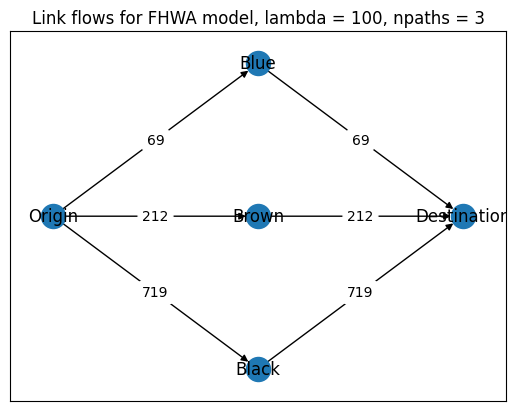

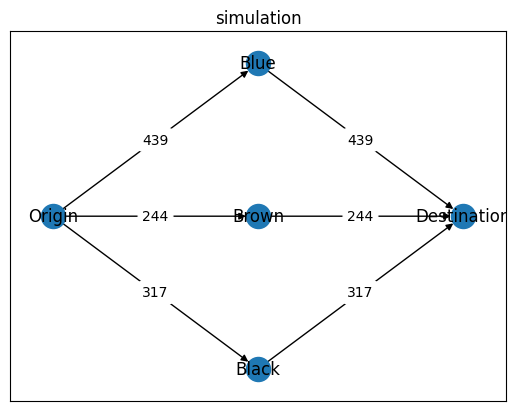

In [ ]:

# =============================================================================
# Build the graph
# =============================================================================
# grid = 5
speed_limit = 20/60 #m/min

G = nx.DiGraph()

G.add_node('Origin', pos = (0, 1))
G.add_node('Black', pos = (1, 0))
G.add_node('Brown', pos = (1, 1))
G.add_node('Blue', pos = (1, 2))
G.add_node('Destination', pos = (2, 1))

G.add_edge('Origin', 'Black', length=1.9/speed_limit, flow=0) #Black
G.add_edge('Black', 'Destination', length=0/speed_limit, flow=0) #Black
G.add_edge('Origin', 'Brown', length=2.6/speed_limit, flow=0) #Brown
G.add_edge('Brown', 'Destination', length=0/speed_limit, flow=0) #Brown
G.add_edge('Origin', 'Blue', length=3.1/speed_limit, flow=0) #Blue
G.add_edge('Blue', 'Destination', length=0/speed_limit, flow=0) #Blue


G2 = nx.DiGraph()

G2.add_node('Origin', pos = (0, 1))
G2.add_node('Black', pos = (1, 0))
G2.add_node('Brown', pos = (1, 1))
G2.add_node('Blue', pos = (1, 2))
G2.add_node('Destination', pos = (2, 1))

w = [0,0,0]

G2.add_edge('Origin', 'Black', length=w[0]*1.9/speed_limit, flow=0) #Black
G2.add_edge('Black', 'Destination', length=0/speed_limit, flow=0) #Black
G2.add_edge('Origin', 'Brown', length=w[1]*2.6/speed_limit, flow=0) #Brown
G2.add_edge('Brown', 'Destination', length=0/speed_limit, flow=0) #Brown
G2.add_edge('Origin', 'Blue', length=w[2]*3.1/speed_limit, flow=0) #Blue
G2.add_edge('Blue', 'Destination', length=0/speed_limit, flow=0) #Blue


# %%
# =============================================================================
# Find paths, set OD pair flow, and initialize flows
# =============================================================================
# Path enumeration parameters
lamb = 100
npaths = 3
edges = G.edges
capacity = 760.   # According to HCM, capacity fo each lane in a unidirectional road can be 1,200 to 1,800 vehicle/hour

# Set origins and destination flows:
TAZ = {}
TAZ[('Origin', 'Destination')] = flow # Adjust to experiments

# Set paths and incidence matrices for each OD pair:
ODpaths = {ODpair: kpaths(G, origin=ODpair[0], destination=ODpair[1], weight='length',
                          lamb=lamb, k=npaths) for ODpair, flow in TAZ.items()}
ODincidence = {ODpair: np.array([[incid(path, edge) for edge in edges] for path in paths]) for ODpair, paths in
               ODpaths.items()}
# Initialize flows
x = np.zeros(shape=(len(G.edges),))
lengths = np.array([G[edge[0]][edge[1]]['length'] for edge in edges])
print('lengths',lengths)
# =============================================================================
# Traffic assignment (MSA to solve SSUE (Static Stochastic User Equilibrium)
# =============================================================================
##### Ramin, when implementing your Monte Carlo simulation, run it here.
# Output of this portion of the code: x as an array with the flows of each edge in graph G.
# To access the sequence of edges for verification, you can run G.edges()

MCS = sim(cdf2,1000)['S1'].value_counts()

#Set parameters
beta = 0.2 # Sets uncertainty (higher beta means less certainty of travel times).
niter = 100 # Number of iterations for Monte Carlo simulation to ensure convergence of equilibrium traffic assignment
m = 5 # Number of non-improving iterations for checking convergence
xbar = np.zeros(shape=(len(G.edges), m + 1))

#Run traffic assignment
for n in range(10):
    y = np.zeros(shape=(len(G.edges),))
    for ODpair, flow in TAZ.items():
        incidence = ODincidence[ODpair]
        lttime = link_impBPR(lengths, x, capacity=capacity) # Translates to total travel time across all drivers
        print(lttime)
        print(incidence)
        yrs, _ = MonteCarlo(lttime, incidence, beta, niter) # Runs a Monte Carlo simulation to find the equilibrium given path time uncertainty
        y += flow * yrs
        print(y)
    x = x + (y - x) / (n + 1)
    print(x)
    print()
    xbar[:, :m] = xbar[:, 1:]
    xbar[:, m] = x
    if n >= m + 1:
        stop = np.sqrt(sum((np.mean(xbar[:, 1:], axis=1) - np.mean(xbar[:, :m], axis=1)) ** 2)) / sum(
            np.mean(xbar[:, :m], axis=1))
        if stop <= 10 ** (-4):
            break

#Assign resulting flows to Graph (visualization)
for k, edge in enumerate(edges):
    i = edge[0]
    j = edge[1]
    G[i][j]['flow'] = x[k]
# %%
# =============================================================================
# Draw the graph:
# =============================================================================

leng = {(n[0], n[1]): n[2]['length'] for n in G.edges(data=True)}
pos = {n[0]: n[1]['pos'] for n in G.nodes(data=True)}
fl = {(n[0], n[1]): round(n[2]['flow']) for n in G.edges(data=True)}

f, ax = plt.subplots()
ax.set_title('Link flows for FHWA model, lambda = ' + str(lamb) + ', npaths = ' + str(npaths))
nx.draw_networkx(G, pos=pos, with_labels=True, ax=ax)
_ = nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=fl, rotate=False, ax=ax)

# f, ax = plt.subplots()
# ax.set_title("Total cost as a function of npaths and lambda")
# plt.xlabel("lambda")
# plt.ylabel("Total cost (10k units)")
# for npaths in p:
#     ax.scatter(l, ttime[npaths], label = "npaths = "+str(npaths))
#     ax.plot(l, ttime[npaths])
# ax.legend()


f2 = fl
f2[('Origin', 'Black')], f2[('Black', 'Destination')] = MCS[2],MCS[2]
f2[('Origin', 'Brown')], f2[('Brown', 'Destination')] = MCS[3],MCS[3]
f2[('Origin', 'Blue')], f2[('Blue', 'Destination')] = MCS[1],MCS[1]
f, ax = plt.subplots()
ax.set_title('simulation')
nx.draw_networkx(G2, pos=pos, with_labels=True, ax=ax)
_ = nx.draw_networkx_edge_labels(G2, pos=pos, edge_labels=f2, rotate=False, ax=ax)

In [ ]:
# Speed = 20
# Capacity = 2000
# Distance = 2
# Congestion = (flow / Capacity)
# Time = Distance / (Speed * (1 - Congestion))

# Time*60

Static Deterministic User Equilibrium

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue May 12 13:48:01 2020

@author: raif
"""


def incid(path, edge):
    edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    if edge in edges:
        return 1
    else:
        return 0


def link_impBPR(free_flow_tt, x, capacity=None, a=0.15, b=4):
    """
    Parameters
    ----------
    Note: free_flow_tt, x and capacity must be in the same edge order.

    free_flow_tt : numpy array
        Array containing free-flow travel times.
    x : numpy array
        Array containing link loads.
    capacity : numpy array, float, optional
        Array or float containing link capacities. Defaults to 760 veh/h
    a : float, optional
        Alpha parameter for BPR function (check out HCM2000). The default is 0.15.
    b : float, optional
        Beta parameter for BPR function (check out HCM2000). The default is 4.0.

    Returns
    -------
    numpy array
        Returns the loaded travel times (impedance) for all links in a numpy array.

    """
    if capacity == None:
        capacity = np.ones(shape=x.shape) * 760
    elif type(capacity) == float:
        capacity = np.ones(shape=x.shape) * capacity
    elif type(capacity) != type(np.array):
        raise TypeError("Please input link capacity in either float or numpy array format")

    return free_flow_tt * (1 + a * (x / capacity) ** b)


def cost_func(alpha, x, y, lengths, incidence, gamma=0.1):
    return max(link_impBPR(lengths, (x + (y - x) * alpha), gamma).dot(incidence.T))


def gss(cost_func, x, y, lengths, incidence, a=0, b=1, tol=1e-5, gamma=0.1):
    # Adapted from:
    # https://en.wikipedia.org/wiki/Golden-section_search
    gr = (np.sqrt(5) + 1) / 2
    c = b - (b - a) / gr
    d = a + (b - a) / gr
    while abs(c - d) > tol:
        if cost_func(c, x, y, lengths, incidence) < cost_func(d, x, y, lengths, incidence):
            b = d
        else:
            a = c

        # We recompute both c and d here to avoid loss of precision which may lead to incorrect results or infinite loop
        c = b - (b - a) / gr
        d = a + (b - a) / gr

    return (b + a) / 2

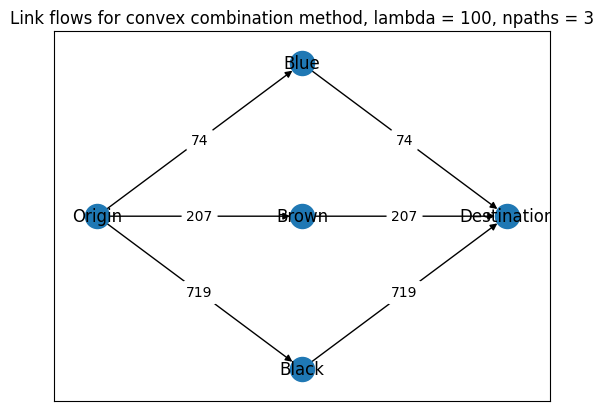

In [ ]:
# =============================================================================
# Build the graph
# =============================================================================
G = nx.DiGraph()

G.add_node('Origin', pos = (0, 1))
G.add_node('Black', pos = (1, 0))
G.add_node('Brown', pos = (1, 1))
G.add_node('Blue', pos = (1, 2))
G.add_node('Destination', pos = (2, 1))

G.add_edge('Origin', 'Black', length=1.9, flow=0) #Black
G.add_edge('Black', 'Destination', length=0, flow=0) #Black
G.add_edge('Origin', 'Brown', length=2.6, flow=0) #Brown
G.add_edge('Brown', 'Destination', length=0, flow=0) #Brown
G.add_edge('Origin', 'Blue', length=3.1, flow=0) #Blue
G.add_edge('Blue', 'Destination', length=0, flow=0) #Blue

# %%
# =============================================================================
# Find paths, set OD pair flow, and initialize flows
# =============================================================================
niter=100
# flow = 10 # Adjust to experiments
npaths = 3
lamb = 100
capacity = 760.

#Enumerate paths
H = G.copy()
paths = []
for i in range(npaths):
    path = nx.dijkstra_path(H, 'Origin', 'Destination', weight='length')
    if path not in paths:
        paths.append(path)
    for j in range(len(path)-1):
        H[path[j]][path[j+1]]['length'] *= (1+lamb)
del H

edges = G.edges
lengths = np.array([G[edge[0]][edge[1]]['length'] for edge in edges])
incidence = np.array([[incid(path, edge) for edge in edges] for path in paths])
for i in range(niter):
    # Step 1: Update link travel times.
    lttime = link_impBPR(lengths, x, capacity=capacity)
    indmin = np.argmin(incidence.dot(lttime))
    # Step 2: Find step direction with another all-or-nothing assignment.
    y = incidence[indmin, :].T * flow
    xp = x
    # Step 3: Find alpha that minimizes individual travel time (I used the
    # golden secion search method)
    alpha = gss(cost_func, x, y, lengths, incidence)
    # Step 4: Move to new point using alpha and the direction y
    x = (x + (y - x) * alpha)
    # Step 5: Check for convergence, if not, go back to step 1.
    stop = np.sqrt(sum((x - xp) ** 2)) / sum(xp)
    if stop <= 10 ** (-3):
        break
    if i == (niter - 1):
        print("Convex combination algorithm timed out")
lttime = link_impBPR(lengths, x)

for k, edge in enumerate(edges):
    i = edge[0]
    j = edge[1]
    G[i][j]['flow'] = x[k]

# %%
# =============================================================================
# Draw the graph:
# =============================================================================
leng = {(n[0], n[1]): n[2]['length'] for n in G.edges(data=True)}
pos = {n[0]: n[1]['pos'] for n in G.nodes(data=True)}
fl = {(n[0], n[1]): round(n[2]['flow']) for n in G.edges(data=True)}

f, ax = plt.subplots()
ax.set_title('Link flows for convex combination method, lambda = ' + str(lamb) + ', npaths = ' + str(npaths))
nx.draw_networkx(G, pos=pos, with_labels=True, ax=ax)
_ = nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=fl, rotate=False, ax=ax)

# f, ax = plt.subplots()
# ax.set_title("Total cost as a function of npaths and lambda (CCM)")
# plt.xlabel("lambda")
# plt.ylabel("Total cost (10k units)")
# for npaths in p:
#     ax.scatter(l, ttime[npaths], label="npaths = " + str(npaths))
#     ax.plot(l, ttime[npaths])
# ax.legend()

ONE SHOT

In [ ]:
def incid(path, edge):
    edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    if edge in edges:
        return 1
    else:
        return 0


def link_imp(lengths, x, gamma=0.1):
    return lengths + gamma * x


def cost_func(alpha, x, y, lengths, incidence, gamma=0.1):
    return max(link_imp(lengths, (x + (y - x) * alpha), gamma).dot(incidence.T))


def gss(cost_func, x, y, lengths, incidence, a=0, b=1, tol=1e-5, gamma=0.1):
    # Adapted from:
    # https://en.wikipedia.org/wiki/Golden-section_search
    gr = (np.sqrt(5) + 1) / 2
    c = b - (b - a) / gr
    d = a + (b - a) / gr
    while abs(c - d) > tol:
        if cost_func(c, x, y, lengths, incidence) < cost_func(d, x, y, lengths, incidence):
            b = d
        else:
            a = c

        # We recompute both c and d here to avoid loss of precision which may lead to incorrect results or infinite loop
        c = b - (b - a) / gr
        d = a + (b - a) / gr

    return (b + a) / 2

['Origin', 'Black', 'Destination']


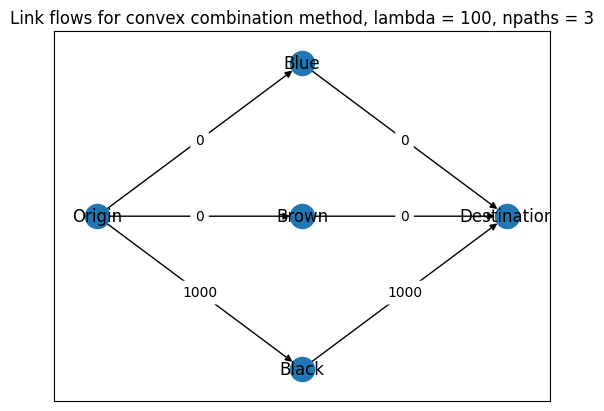

In [ ]:
# =============================================================================
# Build the graph
# =============================================================================
G = nx.DiGraph()

G.add_node('Origin', pos = (0, 1))
G.add_node('Black', pos = (1, 0))
G.add_node('Brown', pos = (1, 1))
G.add_node('Blue', pos = (1, 2))
G.add_node('Destination', pos = (2, 1))

G.add_edge('Origin', 'Black', length=1.9, flow=0) #Black
G.add_edge('Black', 'Destination', length=0, flow=0) #Black
G.add_edge('Origin', 'Brown', length=2.6, flow=0) #Brown
G.add_edge('Brown', 'Destination', length=0, flow=0) #Brown
G.add_edge('Origin', 'Blue', length=3.1, flow=0) #Blue
G.add_edge('Blue', 'Destination', length=0, flow=0) #Blue

# =============================================================================
# Find paths (lambda = 0.4, npaths = 5, flow-delay = length+0.1x)
# =============================================================================

path = nx.dijkstra_path(G, 'Origin', 'Destination', weight='length') #shortest path with dijkstra needed to change to something in terms of time!

edges = G.edges
for i in range(len(path)-1):
    G[path[i]][path[i+1]]['flow'] = flow
sum(G[edge[0]][edge[1]]['flow']*G[edge[0]][edge[1]]['length'] for edge in edges)

# =============================================================================
# Draw the graph:
# =============================================================================
leng = {(n[0], n[1]): n[2]['length'] for n in G.edges(data=True)}
pos = {n[0]: n[1]['pos'] for n in G.nodes(data=True)}
fl = {(n[0], n[1]): round(n[2]['flow']) for n in G.edges(data=True)}

f, ax = plt.subplots()
ax.set_title('Link flows for convex combination method, lambda = ' + str(lamb) + ', npaths = ' + str(npaths))
nx.draw_networkx(G, pos=pos, with_labels=True, ax=ax)
_ = nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=fl, rotate=False, ax=ax)

# f, ax = plt.subplots()
# ax.set_title("Total cost as a function of npaths and lambda (CCM)")
# plt.xlabel("lambda")
# plt.ylabel("Total cost (10k units)")
# for npaths in p:
#     ax.scatter(l, ttime[npaths], label="npaths = " + str(npaths))
#     ax.plot(l, ttime[npaths])
# ax.legend()